In [2]:
#加载所有常用模块
from pyforest import *
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv("F:/data/index.csv",encoding='gbk')

In [4]:
data

,序号,证券简称,年份,(1)资产负债率,(2)剔除预收款项后的资产负债率,(3)长期资本负债率,(4)长期资产适合率,(5)权益乘数,(7)流动负债权益比率,(9)带息债务/全部投入资本,...,(565)人均用水量(立方米/人),(567)生活垃圾无害化处理率(%),(568)农用地(万公顷),(570)造林总面积(公顷),(571)工业污染治理完成投资(万元),(578)投资资金来源分-国家预算内资金(亿元),(595)农村农户固定资产投资(亿元),(605)外商其中外方注册资本(亿美元),(610)期望违约频率EDF,(612)违约状态
0,1,平安银行,2017,0.616243,0.000000,0.000000,0.493009,0.461606,0.000000,0.000000,...,0.097550,0.928246,0.154171,0.171007,0.211808,0.725037,0.019951,0.000385,0.0,0
1,2,万科A,2017,0.655799,0.606708,0.613865,0.494960,0.791971,0.355933,0.329549,...,0.097550,0.928246,0.154171,0.171007,0.211808,0.725037,0.019951,0.000385,0.0,0
2,3,国农科技,2017,0.880236,0.845620,0.933196,0.494301,0.976871,0.520470,0.013451,...,0.097550,0.928246,0.154171,0.171007,0.211808,0.725037,0.019951,0.000385,0.0,0
3,4,世纪星源,2017,0.787384,0.741541,0.924477,0.499406,0.950698,0.506050,0.189671,...,0.097550,0.928246,0.154171,0.171007,0.211808,0.725037,0.019951,0.000385,0.0,0
4,5,深振业A,2017,0.752061,0.705498,0.841639,1.000000,0.932990,0.498205,0.250635,...,0.097550,0.928246,0.154171,0.171007,0.211808,0.725037,0.019951,0.000385,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43761,43762,览海投资,2000,0.912154,0.885826,0.951753,0.495537,0.982415,0.528312,0.113257,...,0.171336,0.860043,0.026384,0.108845,0.034014,0.000158,0.000243,0.115880,0.0,0
43762,43763,厦门空港,2000,0.951784,0.934103,0.953142,0.000000,0.987943,0.533049,0.033277,...,0.144729,0.733037,0.110262,0.008907,0.118751,0.010253,0.006897,0.238060,0.0,0
43763,43764,国美通讯,2000,0.023180,0.000000,0.000000,0.452526,0.000000,0.582862,1.000000,...,0.047034,0.838042,0.119853,0.329713,0.166484,0.014093,0.014738,0.143120,0.0,1
43764,43765,上海医药,2000,0.703179,0.612881,0.000000,0.498607,0.890674,0.444785,0.387461,...,0.164453,0.000000,0.000769,0.017507,0.038076,0.203377,0.000197,0.393638,0.0,0


In [12]:
data['(612)违约状态'].value_counts() #对分类变量的类别进行计数

0    41992
1     1774
Name: (612)违约状态, dtype: int64

## 一、特征工程

### 1.1方差过滤法

In [5]:
data.drop(['序号','年份','证券简称'], axis=1, inplace=True) #删除列

In [6]:
data.shape

(43766, 252)

In [7]:
des1 = data.describe()

In [8]:
std1 = des1.loc['std'].sort_values(ascending=False)

In [9]:
X_16_1 = data[std1[std1>0.1].index] #设置方差阈值=0.1

In [11]:
X_16_1.shape

(43766, 178)

In [31]:
X_16_1.to_csv("F:/data/var.csv",index=True,encoding='gbk')#转换成csv文件

### 1.2随机森林法

In [44]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel

In [45]:
X = X_16_1.drop(['(612)违约状态'],axis=1) #从数据集中删除目标变量
y = data["(612)违约状态"]

In [54]:
#基于随机森林度量各个变量的重要性
clf = RandomForestClassifier()
clf = clf.fit(X,y)

In [57]:
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
importance1 = np.mean([tree.feature_importances_ for tree in clf.estimators_], axis=0)
std1 = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(-importance1)  # 返回由大到小的数据之前的索引

In [60]:
indices

array([129, 153,  98, 173, 128, 168, 137, 142,  96, 130,  40, 158,  26,
        83, 135,  39, 162,  86, 163, 138, 100, 126, 118,  95, 141, 174,
       160,  66, 122,  72,  46, 105,  80,  20,  85, 146,  52, 133, 136,
       170,  63,  92, 166,  89,  81, 121, 115,  71, 176,  35,  87,  64,
       145,  61, 125,  24, 165,  25,  58, 134,  90, 127,  88, 116,  93,
        77,  56, 131, 108,  94, 104,  79, 152,  15, 151,  82,  70,  78,
       101,  69, 150, 123,  30,  84, 159, 147,  38,  14,  50, 169, 167,
        21, 140,  41, 113,  59, 154,  19, 156,  73, 155, 119,  44,  31,
        49,  99, 171,  60, 117, 107, 120, 112, 172, 157, 114,  36,  11,
        29,  55, 149, 111,   3,  76,  91,  18,  57,  45,  54, 109,  43,
       175,  68,  10,  47,   9,  65,   6,   8, 143, 139,   4,  13,  75,
        97,   5,   7,  37,  48, 103,  17,  34, 144, 132,  23,  16, 164,
        74,  62,   2,  22,  42,   1,   0,  12,  32,  27, 161, 106,  28,
       148, 102, 110,  51, 124,  33,  53,  67], dtype=int64)

In [103]:
choose_num = 20  # 选择前20个因子
suoyin = indices[0:choose_num][::-1]

In [104]:
range_ = range(choose_num)

In [105]:
columns=X.columns #查看列名

In [106]:
feature_name = pd.Series(columns)

In [107]:
feature_name[suoyin]

138       (104)净资产收益率ROE(加权)
163               (49)流动资产合计
86     (105)净资产收益率ROE(扣除/加权)
162              (99)每股息税前利润
39             (102)每股EBITDA
135     (260)支付给职工以及为职工支付的现金
83          (2)剔除预收款项后的资产负债率
26           (158)资本支出/折旧和摊销
158                 (44)货币资金
40           (163)权益乘数(杜邦分析)
130            (241)有形资产/总资产
96               (92)每股营业总收入
142      (291)每股净资产(相对年初增长率)
137            (168)营运资本/总资产
168       (103)净资产收益率ROE(平均)
128                  (5)权益乘数
173                 (1)资产负债率
98       (20)归属母公司股东的权益/负债合计
153              (96)每股未分配利润
129             (90)每股净资产BPS
dtype: object

In [157]:
#图片显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] =False #减号unicode编码

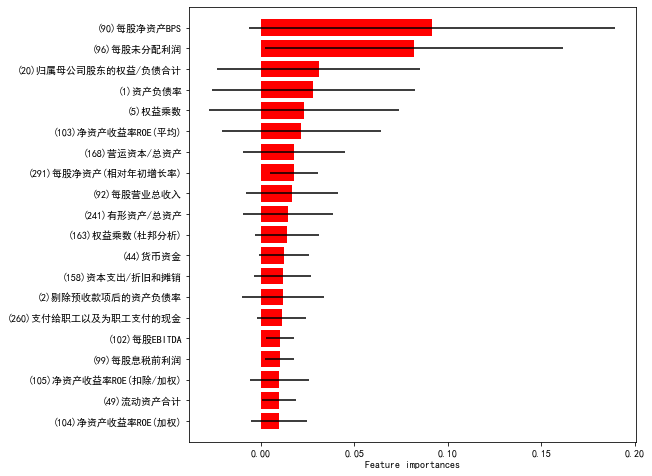

0.4535490927086128

In [109]:
##画图
plt.figure(figsize=(8, 8))
plt.barh(range_, importance1[suoyin], color='r', xerr=std1[suoyin], alpha=1, align='center')
plt.yticks(range(choose_num), feature_name[suoyin])
plt.ylim([-1, choose_num])
# plt.xlim([0.0,0.055])
plt.xlabel('Feature importances')
plt.show()
sum(importance1[suoyin])

## 二、EDA数据探索性分析

In [155]:
import squarify 

In [151]:
#分类变量可视化
data=pd.read_csv("F:/data/class.csv",encoding='gbk')
data.head()

,行业名称
0,金融业
1,房地产业
2,制造业
3,水利、环境和公共设施管理业
4,房地产业


In [152]:
df = data.groupby('行业名称').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

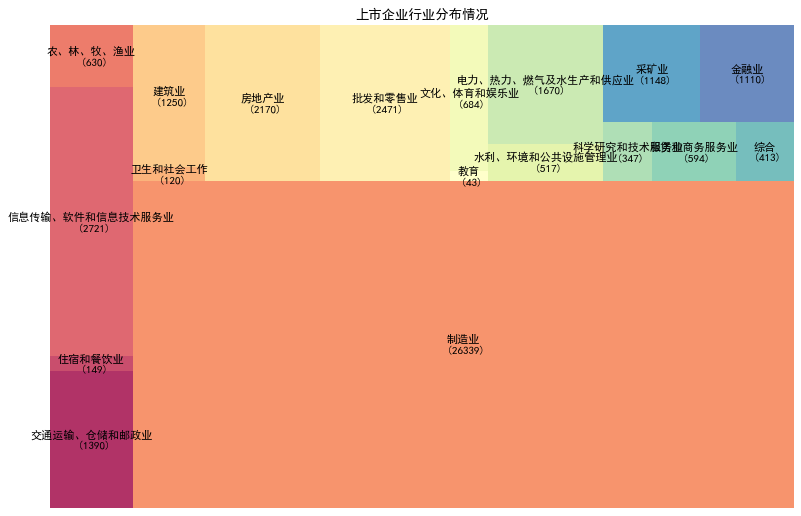

In [159]:
# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('上市企业行业分布情况')
plt.axis('off')
plt.show()

In [160]:
#数值变量可视化
data=pd.read_csv("F:/data/vinlon.csv",encoding='gbk')
data.head()

,class,value
0,资产负债率,0.616243
1,资产负债率,0.655799
2,资产负债率,0.880236
3,资产负债率,0.787384
4,资产负债率,0.752061


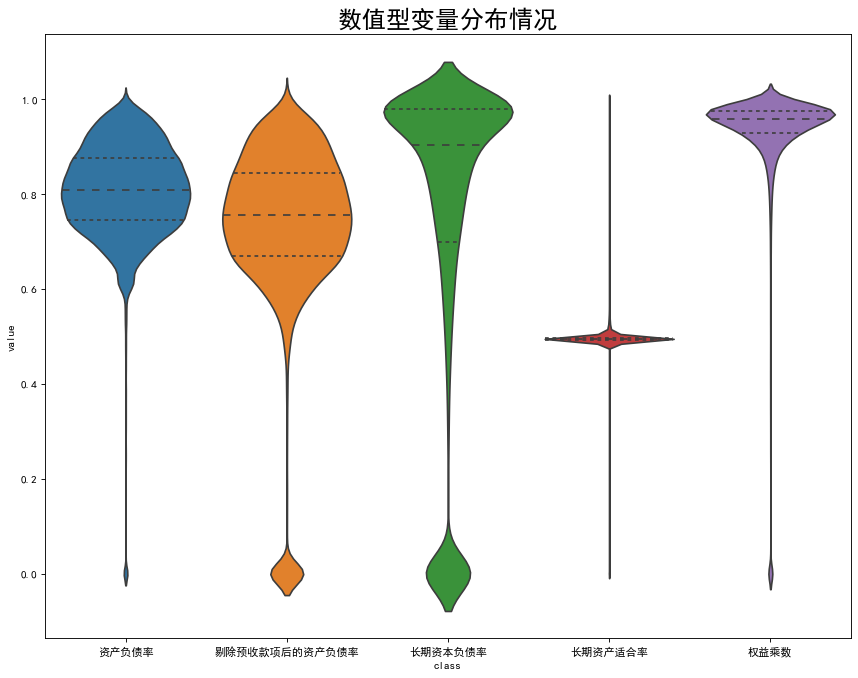

In [161]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='class', y='value', data=data, scale='width', inner='quartile')

# Decoration
plt.title('数值型变量分布情况', fontsize=22)
plt.show()

## 三、建立模型

In [261]:
#压缩数据
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [262]:
sample_feature = reduce_mem_usage(pd.read_csv("F:/data/data.csv",encoding='gbk'))

Memory usage of dataframe is 8403200.00 MB
Memory usage after optimization is: 2335902.00 MB
Decreased by 72.2%


In [263]:
data=sample_feature

In [264]:
data.drop(['序号','证券简称','年份'], axis=1, inplace=True) #删除列

In [265]:
#划分标签
x = data.drop('(612)违约状态',axis=1)
y = data['(612)违约状态']

In [266]:
#划分训练测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=33) 

In [267]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train)  #在训练集采样

In [268]:
print('采样结果为：')
print(y_resampled.value_counts())

采样结果为：
1    31469
0    31469
Name: (612)违约状态, dtype: int64


In [269]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

### 3.1随机森林

In [11]:
import xgboost as xgb
from bayes_opt import BayesianOptimization

In [15]:
#（1）随机森林
def rf_cv(n_estimators, min_samples_split, max_features, max_depth):
    rf=RandomForestClassifier(n_estimators=int(n_estimators),
            min_samples_split=int(min_samples_split),
            max_features=min(max_features, 0.999), # float
            max_depth=int(max_depth),
            random_state=2
        )
    rf.fit(X_resampled,y_resampled)
    y_pred=rf.predict(X_test)
    return metrics.f1_score(y_test, y_pred)

rf_bo = BayesianOptimization(
        rf_cv,
        {'n_estimators': (30, 250),
        'min_samples_split': (2, 25),
        'max_features': (0.1, 0.999),
        'max_depth': (5, 15)}
    )
rf_bo.maximize()
rf_bo.max

|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.5089   |  8.571    |  0.6557   |  13.38    |  182.0    |
|  2        |  0.4765   |  6.144    |  0.2052   |  23.14    |  173.8    |
|  3        |  0.4941   |  6.478    |  0.7295   |  14.07    |  120.9    |
|  4        |  0.499    |  9.803    |  0.107    |  19.68    |  47.07    |
|  5        |  0.5414   |  13.14    |  0.7939   |  3.117    |  30.5     |
|  6        |  0.4899   |  6.736    |  0.799    |  2.665    |  249.7    |
|  7        |  0.5398   |  14.45    |  0.7736   |  23.57    |  33.31    |
|  8        |  0.5695   |  15.0     |  0.1      |  2.0      |  119.9    |
|  9        |  0.5577   |  14.98    |  0.4385   |  2.327    |  172.4    |
|  10       |  0.5289   |  14.85    |  0.98     |  23.69    |  245.4    |
|  11       |  0.5457   |  12.56    |  0.2101   |  2.049    |  117.9    |
|  12       |  0.5341   |  14.94    | 

{'target': 0.5695473251028806,
 'params': {'max_depth': 15.0,
  'max_features': 0.1,
  'min_samples_split': 2.0,
  'n_estimators': 119.91248327200721}}

In [16]:
col=['target']
col.extend(list(rf_bo.max['params'].keys()))
C=[]
for can in rf_bo.res:
    target=can['target']
    par=can['params']
    c0=[target]
    c0.extend([int(par[k]) if k in ['n_estimators','min_samples_split','max_depth'] else round(par[k],4) for k in list(par.keys())])
    print(c0)
    C.append(c0)
rf_bys=pd.DataFrame(C,columns=col)
rf_bys.to_excel('F:/data/随机森林贝叶斯.xls')

[0.5088676671214188, 8, 0.6557, 13, 182]
[0.47648902821316613, 6, 0.2052, 23, 173]
[0.4941329856584094, 6, 0.7295, 14, 120]
[0.49898028552005436, 9, 0.107, 19, 47]
[0.5414110429447853, 13, 0.7939, 3, 30]
[0.48990228013029313, 6, 0.799, 2, 249]
[0.539829853054911, 14, 0.7736, 23, 33]
[0.5695473251028806, 15, 0.1, 2, 119]
[0.5576619273301738, 14, 0.4385, 2, 172]
[0.5289128758673863, 14, 0.98, 23, 245]
[0.5457317073170732, 12, 0.2101, 2, 117]
[0.5340557275541795, 14, 0.8909, 24, 92]
[0.5576619273301738, 14, 0.4699, 2, 216]
[0.5455974842767296, 14, 0.7734, 11, 144]
[0.555729984301413, 14, 0.4312, 2, 73]
[0.5430359937402192, 14, 0.9931, 3, 123]
[0.5532915360501567, 14, 0.1238, 23, 209]
[0.5620608899297423, 14, 0.2107, 24, 121]
[0.5643485211830536, 14, 0.1281, 9, 102]
[0.46556977452772697, 5, 0.2572, 24, 232]
[0.5637371338083929, 14, 0.3162, 2, 196]
[0.5583596214511041, 14, 0.4519, 2, 44]
[0.5600636435958631, 14, 0.2588, 2, 243]
[0.5576923076923077, 14, 0.2542, 10, 31]
[0.5598086124401914, 1

<IPython.core.display.Javascript object>

In [138]:
clf1 = RandomForestClassifier(n_estimators=120, max_depth=15, min_samples_split=2,
                              max_features=0.1)

In [139]:
clf1.fit(X_resampled,y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=0.1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [140]:
y_pred=clf1.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score
print('auc_score:{}'.format(accuracy_score(y_test, y_pred)))
print('Precision',metrics.precision_score(y_test, y_pred))
print('Recall',metrics.recall_score(y_test, y_pred))
print('F1-score:',metrics.f1_score(y_test, y_pred))

auc_score:0.9522939133613599
Precision 0.43586550435865506
Recall 0.8353221957040573
F1-score: 0.5728314238952538


### 3.2XGBoost

In [85]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [86]:
#（3）xgb
#需提前将自变量：X_jn 因变量y 准备好
from sklearn.model_selection import RepeatedKFold

In [87]:
def xgb_cv(gamma,max_depth,lambda0,subsample,colsample_bytree,min_child_weight
           ,eta,num_rounds,n_estimator,reg_alpha):
    params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',  # 多分类的问题
    #'objective': 'reg:logistic',  # 多分类的问题
    'num_class': 2,               # 类别数，与 multisoftmax 并用
    'gamma': min(gamma,0.39),                  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth': int(max_depth),               # 构建树的深度，越大越容易过拟合
    'lambda': lambda0,                   # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'subsample': subsample,              # 随机采样训练样本
    'colsample_bytree':min(colsample_bytree,0.9),       # 生成树时进行的列采样
    'min_child_weight': int(min_child_weight),
    'n_estimator':int(n_estimator),
    'reg_alpha':reg_alpha,
    'silent': 0,                   # 设置成1则没有运行信息输出，最好是设置为0.
    'eta': eta,                  # 如同学习率
    'seed': 1000,
    'nthread': 6,                  # cpu 线程数
    }
    F1=[]
    kf = RepeatedKFold(n_splits=4, n_repeats=2, random_state=10)
    for train_index, test_index in kf.split(x):
        X_train, y_train = x.loc[train_index], y.loc[train_index]
        X_test, y_test = x.loc[test_index], y.loc[test_index]
        X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train)  # 在训练集采样    
        plst = params.items()
        dtrain = xgb.DMatrix(X_resampled, label=y_resampled) # 组成训练样本
        model = xgb.train(plst, dtrain, int(num_rounds)) # xgboost模型训练
        test = xgb.DMatrix(X_test)
        test_pred=model.predict(test)
        F1.append(metrics.f1_score(y_test, test_pred))
    return np.mean(F1)

In [ ]:
xgb_bo = BayesianOptimization(
        xgb_cv,
        {'gamma': (0.05, 0.39),
        'max_depth': (3, 18),
        'lambda0': (0.05,2),
        'subsample': (0.4, 0.95),
        'colsample_bytree': (0.3, 0.8),
        'min_child_weight': (2, 8),
        'eta': (0.005, 0.09),
        'min_child_weight': (2, 8),
        'num_rounds':(5,13),
        'n_estimator':(50,300),
        'reg_alpha':(0.001,0.95)
        }
    )
xgb_bo.maximize()

xgb_bo.max
xgb_bo.res

|   iter    |  target   | colsam... |    eta    |   gamma   |  lambda0  | max_depth | min_ch... | n_esti... | num_ro... | reg_alpha | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.5655   |  0.7067   |  0.0418   |  0.1631   |  1.52     |  15.46    |  2.24     |  171.0    |  8.007    |  0.9246   |  0.8305   |
|  2        |  0.56     |  0.3716   |  0.04978  |  0.1896   |  1.571    |  14.88    |  4.255    |  287.0    |  11.36    |  0.4281   |  0.541    |
|  3        |  0.5594   |  0.6137   |  0.03018  |  0.2307   |  0.2931   |  11.24    |  3.127    |  199.0    |  8.971    |  0.4238   |  0.9259   |
|  4        |  0.5484   |  0.7284   |  0.01444  |  0.1891   |  1.898    |  11.97    |  5.348    |  289.6    |  9.537    |  0.5231   |  0.7958   |
|  5        |  0.5464   |  0.6688   |  0.01382  |  0.2897   |  0.05202  |  10.99    |  5.413    |  88.84    |  9.474    |  0

In [89]:
xgb_bo.max

{}

In [16]:
#最优模型保存参数-存储贝叶斯过程数据

params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',  # 多分类的问题
    'num_class': 2,               # 类别数，与 multisoftmax 并用
    'gamma': 0.36,                  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth': 16,               # 构建树的深度，越大越容易过拟合
    'lambda': 0.21,                   # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'subsample': 0.58,              # 随机采样训练样本
    'colsample_bytree': 0.33,       # 生成树时进行的列采样
    'min_child_weight': 2.4,
    'silent': 0,                   # 设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.06,                  # 如同学习率
    'seed': 1000,
    'nthread': 4,                  # cpu 线程数
}

In [26]:
xgb_max=xgb_bo.max['params']

In [27]:
#将xgb.max 转为模型可以使用的参数
def get_params(params,xgb_max):
  xgb_max=xgb_bo.max['params']
  for k,v in zip(xgb_max.keys(),xgb_max.values()):
    if k!='num_rounds':
        #print(k,v)
        if k=='lambda0':
            params['lambda']=int(v)
        elif k in ['max_depth','min_child_weight','n_estimator']:
            params[k]=int(v)
        else:
            params[k]=v
    else:
        num_rounds = int(v)
  return params,num_rounds

p0,n0=get_params(params,xgb_max)
print(p0,n0)

{'booster': 'gbtree', 'objective': 'multi:softmax', 'num_class': 2, 'gamma': 0.21066514100367412, 'max_depth': 17, 'lambda': 0, 'subsample': 0.913934271133015, 'colsample_bytree': 0.6607037324172483, 'min_child_weight': 3, 'silent': 0, 'eta': 0.04859422014416616, 'seed': 1000, 'nthread': 4, 'n_estimator': 181, 'reg_alpha': 0.3814925127944298} 12


In [29]:
#将贝叶斯过程表存储
col=['target']
col.extend(list(xgb_max.keys()))
C=[]
for can in xgb_bo.res:
    target=can['target']
    par=can['params']
    c0=[target]
    c0.extend([int(par[k]) if k in ['max_depth','min_child_weight','lambda0','num_rounds'] else round(par[k],4) for k in list(par.keys())])
    print(c0)
    C.append(c0)
xg_bys=pd.DataFrame(C,columns=col)
xg_bys.to_excel('F:/data/xgb贝叶斯.xls')

[0.5791067248442666, 0.4154, 0.0724, 0.0607, 0, 16, 2, 54.4665, 11, 0.7595, 0.5595]
[0.4631342580050524, 0.6487, 0.0197, 0.1338, 1, 3, 4, 133.5051, 6, 0.6484, 0.7116]
[0.4838728903097642, 0.6647, 0.0464, 0.3092, 0, 4, 4, 157.9076, 5, 0.6333, 0.4958]
[0.5552605287867285, 0.4233, 0.0585, 0.3097, 1, 11, 6, 238.515, 9, 0.3469, 0.7825]
[0.47692124052114326, 0.4304, 0.0098, 0.1467, 1, 4, 2, 266.2111, 12, 0.3713, 0.4006]
[0.5735343594618282, 0.4987, 0.068, 0.3298, 0, 17, 3, 55.8776, 9, 0.2348, 0.4357]
[0.5597458532244421, 0.393, 0.0276, 0.3341, 1, 17, 7, 185.9949, 12, 0.9142, 0.7815]
[0.45702060865646743, 0.3, 0.005, 0.39, 2, 3, 8, 50.0, 13, 0.95, 0.4]
[0.5532029935109924, 0.8, 0.005, 0.05, 0, 18, 2, 300.0, 5, 0.5855, 0.4]
[0.558811337127491, 0.5716, 0.0776, 0.1943, 1, 17, 2, 224.8372, 6, 0.94, 0.611]
[0.5623067706106444, 0.8, 0.09, 0.3211, 0, 18, 8, 271.3832, 5, 0.95, 0.95]
[0.5801441666829519, 0.8, 0.09, 0.05, 0, 18, 2, 87.638, 13, 0.001, 0.4]
[0.5546877982083658, 0.6639, 0.0242, 0.18, 1, 1

In [12]:
from xgboost import XGBClassifier

In [13]:
clf2 = XGBClassifier(booster= 'gbtree', objective='multi:softmax',num_class=2,
gamma=0.21066514100367412, max_depth=17, reg_lambda=0, subsample= 0.913934271133015,
 colsample_bytree= 0.6607037324172483, min_child_weight= 3, silent= 0, 
 eta=0.04859422014416616, seed=1000, nthread= 4, n_estimator= 181,
 reg_alpha= 0.3814925127944298,num_rounds=12)

In [14]:
clf2.fit(X_resampled,y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6607037324172483,
              eta=0.04859422014416616, gamma=0.21066514100367412,
              learning_rate=0.1, max_delta_step=0, max_depth=17,
              min_child_weight=3, missing=None, n_estimator=181,
              n_estimators=100, n_jobs=1, nthread=4, num_class=2, num_rounds=12,
              objective='multi:softmax', random_state=0,
              reg_alpha=0.3814925127944298, reg_lambda=0, scale_pos_weight=1,
              seed=1000, silent=0, subsample=0.913934271133015, verbosity=1)

In [15]:
y_pred=clf2.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
print('auc_score:{}'.format(accuracy_score(y_test, y_pred)))
print('Precision',metrics.precision_score(y_test, y_pred))
print('Recall',metrics.recall_score(y_test, y_pred))
print('F1-score:',metrics.f1_score(y_test, y_pred))

auc_score:0.962529702065436
Precision 0.5068912710566615
Recall 0.7899761336515513
F1-score: 0.6175373134328358


### 3.3LightGBM

In [242]:
from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score

In [243]:
sample_feature = reduce_mem_usage(pd.read_csv("F:/data/data22.csv",encoding='gbk'))
data=sample_feature
data.head(2)

Memory usage of dataframe is 8753328.00 MB
Memory usage after optimization is: 2379668.00 MB
Decreased by 72.8%


,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,W,X,Y
0,1,平安银行,2017,0.939453,0.803223,0.072876,0.616211,0.461670,0.494385,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.500977,0.0,0.492432,7,0
1,2,万科A,2017,0.882812,0.895508,0.077087,0.655762,0.791992,0.497070,0.588867,...,0.0,0.606934,0.325439,0.0,0.692871,0.000000,1.0,0.491943,3,0


In [244]:
data.drop(['A','B','C'], axis=1, inplace=True) #删除列

In [245]:
#对行业这一分类变量进行类别编码
data["X"] = data["X"].astype('category')
data["X_cat"] = data["X"].cat.codes
data = data.drop(["X"],axis = 1)

In [246]:
#划分标签
x = data.drop('Y',axis=1)
y = data['Y']

In [247]:
#划分训练测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=33) 

In [248]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train)  #在训练集采样
print('采样结果为：')
print(y_resampled.value_counts())

采样结果为：
1    31469
0    31469
Name: Y, dtype: int64


In [93]:
def lgb_cv(n_estimators, min_samples_split, max_features, max_depth):
    lgb=LGBMClassifier(n_estimators=int(n_estimators),
            min_samples_split=int(min_samples_split),
            max_features=min(max_features, 0.999), # float
            max_depth=int(max_depth),
            random_state=2
        )
    lgb.fit(X_resampled,y_resampled)
    y_pred=lgb.predict(X_test)
    return metrics.f1_score(y_test, y_pred)

lgb_bo = BayesianOptimization(
        lgb_cv,
        {'n_estimators': (30, 250),
        'min_samples_split': (2, 25),
        'max_features': (0.1, 0.999),
        'max_depth': (5, 15)}
    )
lgb_bo.maximize()
lgb_bo.max

|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.5582   |  11.25    |  0.511    |  15.03    |  171.0    |
|  2        |  0.5603   |  13.35    |  0.6202   |  15.13    |  171.4    |
|  3        |  0.5092   |  8.237    |  0.481    |  6.73     |  50.92    |
|  4        |  0.5135   |  9.679    |  0.8962   |  12.15    |  39.76    |
|  5        |  0.5637   |  12.96    |  0.7384   |  24.33    |  155.0    |
|  6        |  0.5806   |  12.75    |  0.9507   |  23.62    |  249.8    |
|  7        |  0.5816   |  14.99    |  0.5806   |  24.5     |  247.4    |
|  8        |  0.5472   |  5.377    |  0.3323   |  24.76    |  242.5    |
|  9        |  0.5826   |  14.96    |  0.4905   |  2.509    |  249.9    |
|  10       |  0.5581   |  14.75    |  0.8002   |  3.081    |  125.0    |
|  11       |  0.5411   |  14.87    |  0.7207   |  24.76    |  93.79    |
|  12       |  0.5816   |  14.98    | 

{'target': 0.5825726141078839,
 'params': {'max_depth': 14.963042896637779,
  'max_features': 0.49051508072185124,
  'min_samples_split': 2.5094875863900015,
  'n_estimators': 249.87110043078403}}

In [94]:
gbm = LGBMClassifier(n_estimators=250, max_depth=15, min_samples_split=2.5094875863900015,
                              max_features=0.49051508072185124)

In [95]:
gbm.fit(X_resampled,y_resampled)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=15,
               max_features=0.49051508072185124, min_child_samples=20,
               min_child_weight=0.001, min_samples_split=2.5094875863900015,
               min_split_gain=0.0, n_estimators=250, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [96]:
y_pred=gbm.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print('auc_score:{}'.format(accuracy_score(y_test, y_pred)))
print('Precision',metrics.precision_score(y_test, y_pred))
print('Recall',metrics.recall_score(y_test, y_pred))
print('F1-score:',metrics.f1_score(y_test, y_pred))

auc_score:0.9556753792725279
Precision 0.4572538860103627
Recall 0.8424821002386634
F1-score: 0.5927791771620488


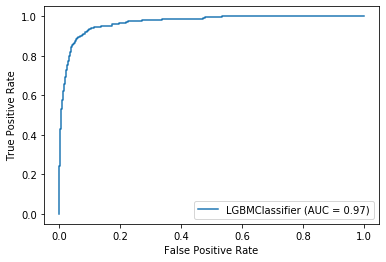

In [98]:
#绘制ROC曲线
model_disp = plot_roc_curve(gbm, X_test, y_test)
plt.show()

## 3.4 Catboost

In [127]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import catboost as cb
import catboost as CatBoost

In [111]:
data['X'] = data['X'].astype("category").cat.codes + 1

In [112]:
cat_features_index = [0, 1, 2, 3, 4, 5, 6,7,8,9,10,11,12]

In [128]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, CatBoost, Pool, cv
from bayes_opt import BayesianOptimization

In [165]:
def cab_cv(depth, learning_rate, l2_leaf_reg, iterations):
    cab=cb.CatBoostClassifier()
    cab.fit(X_resampled,y_resampled)
    y_pred=cab.predict(X_test)
    return metrics.f1_score(y_test, y_pred)

cab_bo = BayesianOptimization(
        cab_cv,
        {'depth': (5,15),
          'learning_rate': (0.03,0.15),
          'l2_leaf_reg': (1,9),
          'iterations': (300, 500)}
    )
cab_bo.maximize()
cab_bo.max

|   iter    |  target   |   depth   | iterat... | l2_lea... | learni... |
-------------------------------------------------------------------------
Learning rate set to 0.060405
0:	learn: 0.6208489	total: 62.1ms	remaining: 1m 2s
1:	learn: 0.5618905	total: 96.5ms	remaining: 48.2s
2:	learn: 0.5107690	total: 130ms	remaining: 43.3s
3:	learn: 0.4705370	total: 164ms	remaining: 40.7s
4:	learn: 0.4289230	total: 200ms	remaining: 39.9s
5:	learn: 0.4012412	total: 247ms	remaining: 41s
6:	learn: 0.3760438	total: 293ms	remaining: 41.6s
7:	learn: 0.3554374	total: 348ms	remaining: 43.1s
8:	learn: 0.3366189	total: 382ms	remaining: 42s
9:	learn: 0.3182799	total: 420ms	remaining: 41.6s
10:	learn: 0.3034551	total: 469ms	remaining: 42.2s
11:	learn: 0.2906286	total: 515ms	remaining: 42.4s
12:	learn: 0.2800784	total: 571ms	remaining: 43.3s
13:	learn: 0.2701209	total: 617ms	remaining: 43.4s
14:	learn: 0.2617174	total: 654ms	remaining: 43s
15:	learn: 0.2555046	total: 691ms	remaining: 42.5s
16:	learn: 0.2481430

{'target': 0.5821025195482189,
 'params': {'depth': 9.8974522646993,
  'iterations': 365.2886605012626,
  'l2_leaf_reg': 2.272585546347634,
  'learning_rate': 0.12934154690085695}}

In [166]:
#用最优参数拟合数据
clf = cb.CatBoostClassifier(depth=10, iterations=365, l2_leaf_reg=2.272585546347634, 
                            learning_rate=0.12934154690085695,loss_function="Logloss")

In [167]:
clf.fit(X_resampled,y_resampled)

0:	learn: 0.5226223	total: 348ms	remaining: 2m 6s
1:	learn: 0.4215626	total: 652ms	remaining: 1m 58s
2:	learn: 0.3525471	total: 930ms	remaining: 1m 52s
3:	learn: 0.3013439	total: 1.19s	remaining: 1m 47s
4:	learn: 0.2614396	total: 1.45s	remaining: 1m 44s
5:	learn: 0.2378234	total: 1.74s	remaining: 1m 43s
6:	learn: 0.2154023	total: 1.99s	remaining: 1m 41s
7:	learn: 0.2012538	total: 2.29s	remaining: 1m 42s
8:	learn: 0.1885884	total: 2.67s	remaining: 1m 45s
9:	learn: 0.1807146	total: 2.92s	remaining: 1m 43s
10:	learn: 0.1721291	total: 3.21s	remaining: 1m 43s
11:	learn: 0.1660336	total: 3.55s	remaining: 1m 44s
12:	learn: 0.1612229	total: 3.86s	remaining: 1m 44s
13:	learn: 0.1577824	total: 4.14s	remaining: 1m 43s
14:	learn: 0.1540522	total: 4.43s	remaining: 1m 43s
15:	learn: 0.1507195	total: 4.76s	remaining: 1m 43s
16:	learn: 0.1454021	total: 5.11s	remaining: 1m 44s
17:	learn: 0.1427137	total: 5.39s	remaining: 1m 43s
18:	learn: 0.1400789	total: 5.68s	remaining: 1m 43s
19:	learn: 0.1375125	to

In [168]:
y_pred=clf.predict(X_test)

In [169]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print('auc_score:{}'.format(accuracy_score(y_test, y_pred)))
print('Precision',metrics.precision_score(y_test, y_pred))
print('Recall',metrics.recall_score(y_test, y_pred))
print('F1-score:',metrics.f1_score(y_test, y_pred))

auc_score:0.9620727472125754
Precision 0.5030395136778115
Recall 0.7899761336515513
F1-score: 0.6146703806870937


## 四、模型融合

In [208]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import catboost as cb
import catboost as CatBoost

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [232]:
clf1 = RandomForestClassifier(n_estimators=120, max_depth=15, min_samples_split=2,
                              max_features=0.1)

In [260]:
clf2 = XGBClassifier(booster= 'gbtree', objective='multi:softmax',num_class=2,
gamma=0.21066514100367412, max_depth=17, reg_lambda=0, subsample= 0.913934271133015,
 colsample_bytree= 0.6607037324172483, min_child_weight= 3, silent= 0, 
 eta=0.04859422014416616, seed=1000, nthread= 4, n_estimator= 181,
 reg_alpha= 0.3814925127944298,num_rounds=12)

In [234]:
clf3 = LGBMClassifier(n_estimators=250, max_depth=15, min_samples_split=2.5094875863900015,
                              max_features=0.49051508072185124)

In [235]:
clf4 = cb.CatBoostClassifier(depth=10, iterations=365, l2_leaf_reg=2.272585546347634, 
                            learning_rate=0.12934154690085695,loss_function="Logloss")

In [213]:
#创建训练的数据集
data =x.values
target = y.values

In [214]:
clfs = [clf1,clf2,clf3,clf4]

In [215]:
#切分一部分数据作为测试集
X, X_predict, y, y_predict = train_test_split(data, target, test_size=0.3, random_state=2020)

In [216]:
#切分训练数据集为d1,d2两部分
X_d1, X_d2, y_d1, y_d2 = train_test_split(X, y, test_size=0.5, random_state=2020)
dataset_d1 = np.zeros((X_d2.shape[0], len(clfs)))
dataset_d2 = np.zeros((X_predict.shape[0], len(clfs)))

In [217]:
for j, clf in enumerate(clfs):
    #依次训练各个单模型
    clf.fit(X_d1, y_d1)
    y_submission = clf.predict_proba(X_d2)[:, 1]
    dataset_d1[:, j] = y_submission
    #对于测试集，直接用这k个模型的预测值作为新的特征。
    dataset_d2[:, j] = clf.predict_proba(X_predict)[:, 1]
    
    y_pred=clf.predict(X_predict)
    f1=metrics.f1_score(y_predict, y_pred)
    print("val auc Score: %f" % roc_auc_score(y_predict, dataset_d2[:, j]))
    print("f1 Score: %f" % f1)

val auc Score: 0.970168
f1 Score: 0.585018
val auc Score: 0.765225
f1 Score: 0.629956
val auc Score: 0.971816
f1 Score: 0.615894
0:	learn: 0.4575550	total: 214ms	remaining: 1m 17s
1:	learn: 0.3033962	total: 372ms	remaining: 1m 7s
2:	learn: 0.2184187	total: 546ms	remaining: 1m 5s
3:	learn: 0.1626725	total: 755ms	remaining: 1m 8s
4:	learn: 0.1268868	total: 998ms	remaining: 1m 11s
5:	learn: 0.1072019	total: 1.17s	remaining: 1m 10s
6:	learn: 0.0922631	total: 1.37s	remaining: 1m 10s
7:	learn: 0.0845010	total: 1.52s	remaining: 1m 7s
8:	learn: 0.0781514	total: 1.7s	remaining: 1m 7s
9:	learn: 0.0742963	total: 1.85s	remaining: 1m 5s
10:	learn: 0.0702985	total: 2.07s	remaining: 1m 6s
11:	learn: 0.0671373	total: 2.29s	remaining: 1m 7s
12:	learn: 0.0643521	total: 2.47s	remaining: 1m 6s
13:	learn: 0.0620326	total: 2.67s	remaining: 1m 6s
14:	learn: 0.0608133	total: 2.86s	remaining: 1m 6s
15:	learn: 0.0574747	total: 3.08s	remaining: 1m 7s
16:	learn: 0.0554098	total: 3.31s	remaining: 1m 7s
17:	learn: 

In [218]:
#融合使用的模型
clf =LogisticRegression(solver='lbfgs')
clf.fit(dataset_d1, y_d2)
y_submission = clf.predict_proba(dataset_d2)[:, 1]

In [219]:
y_pred=clf.predict(dataset_d2)
f1=metrics.f1_score(y_predict, y_pred)
print("Val auc Score of Blending: %f" % (roc_auc_score(y_predict, y_submission)))
print("f1 Blending: %f" % f1)

Val auc Score of Blending: 0.970819
f1 Blending: 0.618141


## 五、信用评级

In [325]:
#下面用xgb预测违约概率
X_train=X_resampled
y_train=y_resampled

In [326]:
import xgboost as xgb
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [332]:
alltest=xgb.DMatrix(x)

In [327]:
params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth':17,
    'lambda':0,
    'subsample':0.913934271133015,
    'colsample_bytree':0.6607037324172483,
    'min_child_weight':3,
    'eta': 0.04859422014416616,
    'seed':1000,
    'nthread':4,
     'silent':0}

In [328]:
bst=xgb.train(params,dtrain,num_boost_round=100)

In [333]:
ypred=bst.predict(alltest)

In [334]:
ypred

array([0.00484235, 0.0057764 , 0.01729469, ..., 0.9953009 , 0.05232348,
       0.00952555], dtype=float32)

In [335]:
ypred = pd.DataFrame(ypred) #转为dataframe
ypred .shape

(43766, 1)

In [338]:
ypred.to_csv("F:/data/ypred.csv",index=False)#转换成csv文件

In [339]:
data=pd.read_csv("F:/data/rank.csv",encoding='gbk')
data.head()

,年份,企业名称,违约概率,(612)违约状态
0,2017,*ST嘉陵,0.992158,1
1,2017,*ST河化,0.990051,1
2,2017,*ST沪科,0.988681,1
3,2017,*ST中绒,0.986977,1
4,2017,*ST中富,0.986401,1


In [342]:
w=data['违约概率']

In [343]:
d=w.describe()

In [344]:
d

count    3424.000000
mean        0.044669
std         0.143709
min         0.003761
25%         0.005106
50%         0.007325
75%         0.016784
max         0.992158
Name: 违约概率, dtype: float64

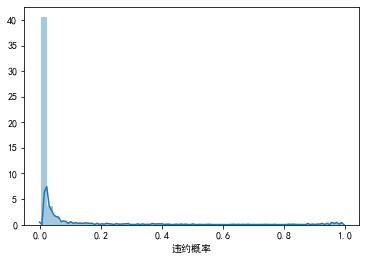

In [351]:
#查看违约概率分布
sns.distplot(data['违约概率'])
plt.show()